##  Reading and Understanding the Data

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required packages
import numpy as np
import pandas as pd

In [4]:
media="C:\\Users\\HRIDYA RAMESH K\\Downloads\\mediacompany.csv"

In [5]:
#Importing dataset
media = pd.read_csv('C:\\Users\\HRIDYA RAMESH K\\Downloads\\mediacompany.csv')

In [6]:
# explore the top 5 rows
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [7]:
# Converting date to Pandas datetime format
media['Date'] = pd.to_datetime(media['Date'])

In [8]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,NaN
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,NaN
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,NaN
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,NaN
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,NaN


In [9]:
#drop the Unnamed Column
media = media.drop('Unnamed: 7',axis = 1)

In [10]:
media.shape

(80, 7)

In [11]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 80 non-null     datetime64[ns]
 1   Views_show           80 non-null     int64         
 2   Visitors             80 non-null     int64         
 3   Views_platform       80 non-null     int64         
 4   Ad_impression        80 non-null     int64         
 5   Cricket_match_india  80 non-null     int64         
 6   Character_A          80 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.5 KB


In [12]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [13]:
# Deriving "days since the show started"
from datetime import date

d0 = date(2017, 2, 28)
d1 = pd.to_datetime(media['Date']).dt.date
delta = d1 - d0
media['day']= delta

In [14]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [15]:
# Cleaning days
media['day'] = media['day'].astype(str)
media['day'] = media['day'].map(lambda x: x[0:2])
media['day'] = media['day'].astype(int)

In [16]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


<AxesSubplot:xlabel='day'>

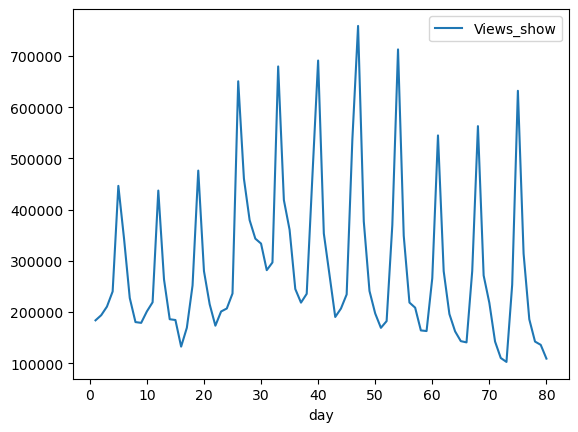

In [17]:
# days vs Views_show
media.plot.line(x='day', y='Views_show')

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


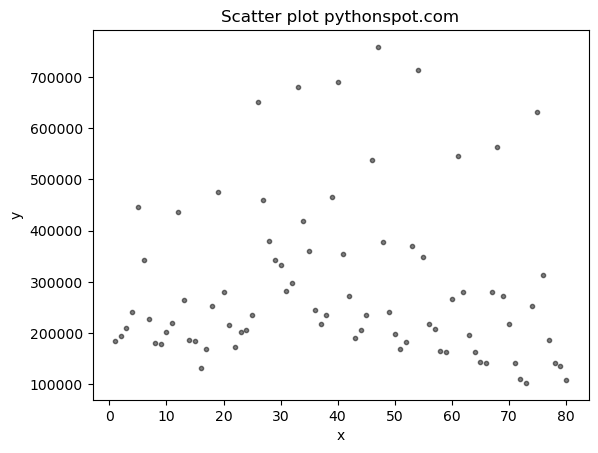

In [19]:
# Scatter Plot (days vs Views_show)
colors = (0,0,0)
area = np.pi*3
plt.scatter(media.day, media.Views_show, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

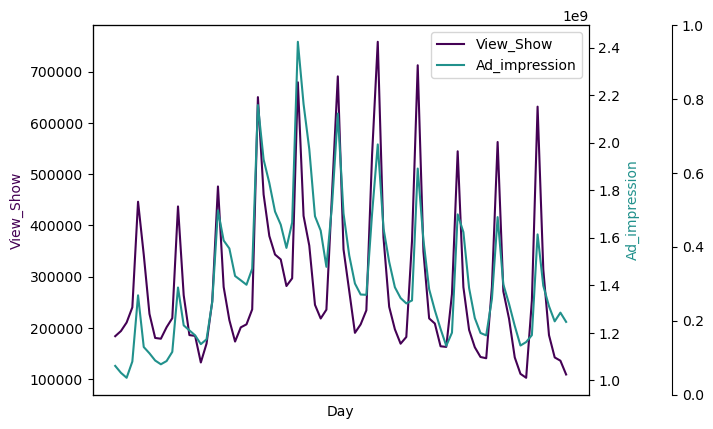

In [20]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [21]:
# Generate the weekday variable
media['weekday'] = (media['day']+3)%7
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


<AxesSubplot:xlabel='weekday', ylabel='Views_show'>

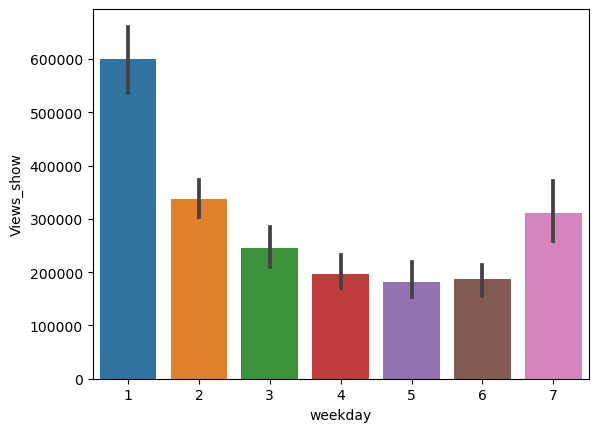

In [22]:
#weekday views 
sns.barplot(data=media,x="weekday",y="Views_show")

In [23]:
# generate weekend variable
#1 as weekend , 0 as weekday
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

media['weekend']=[cond(i) for i in media['day']]

In [24]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [25]:
# Drop 'Date' as we have created the dummies for it

media.drop(['Date'], axis = 1, inplace = True)

In [26]:
media.head()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,183738,1260228,1706478,1060860448,0,0,1,4,0
1,193763,1270561,1690727,1031846645,0,0,2,5,0
2,210479,1248183,1726157,1010867575,0,0,3,6,0
3,240061,1492913,1855353,1079194579,1,0,4,7,1
4,446314,1594712,2041418,1357736987,0,0,5,1,1


## Visualising the data

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

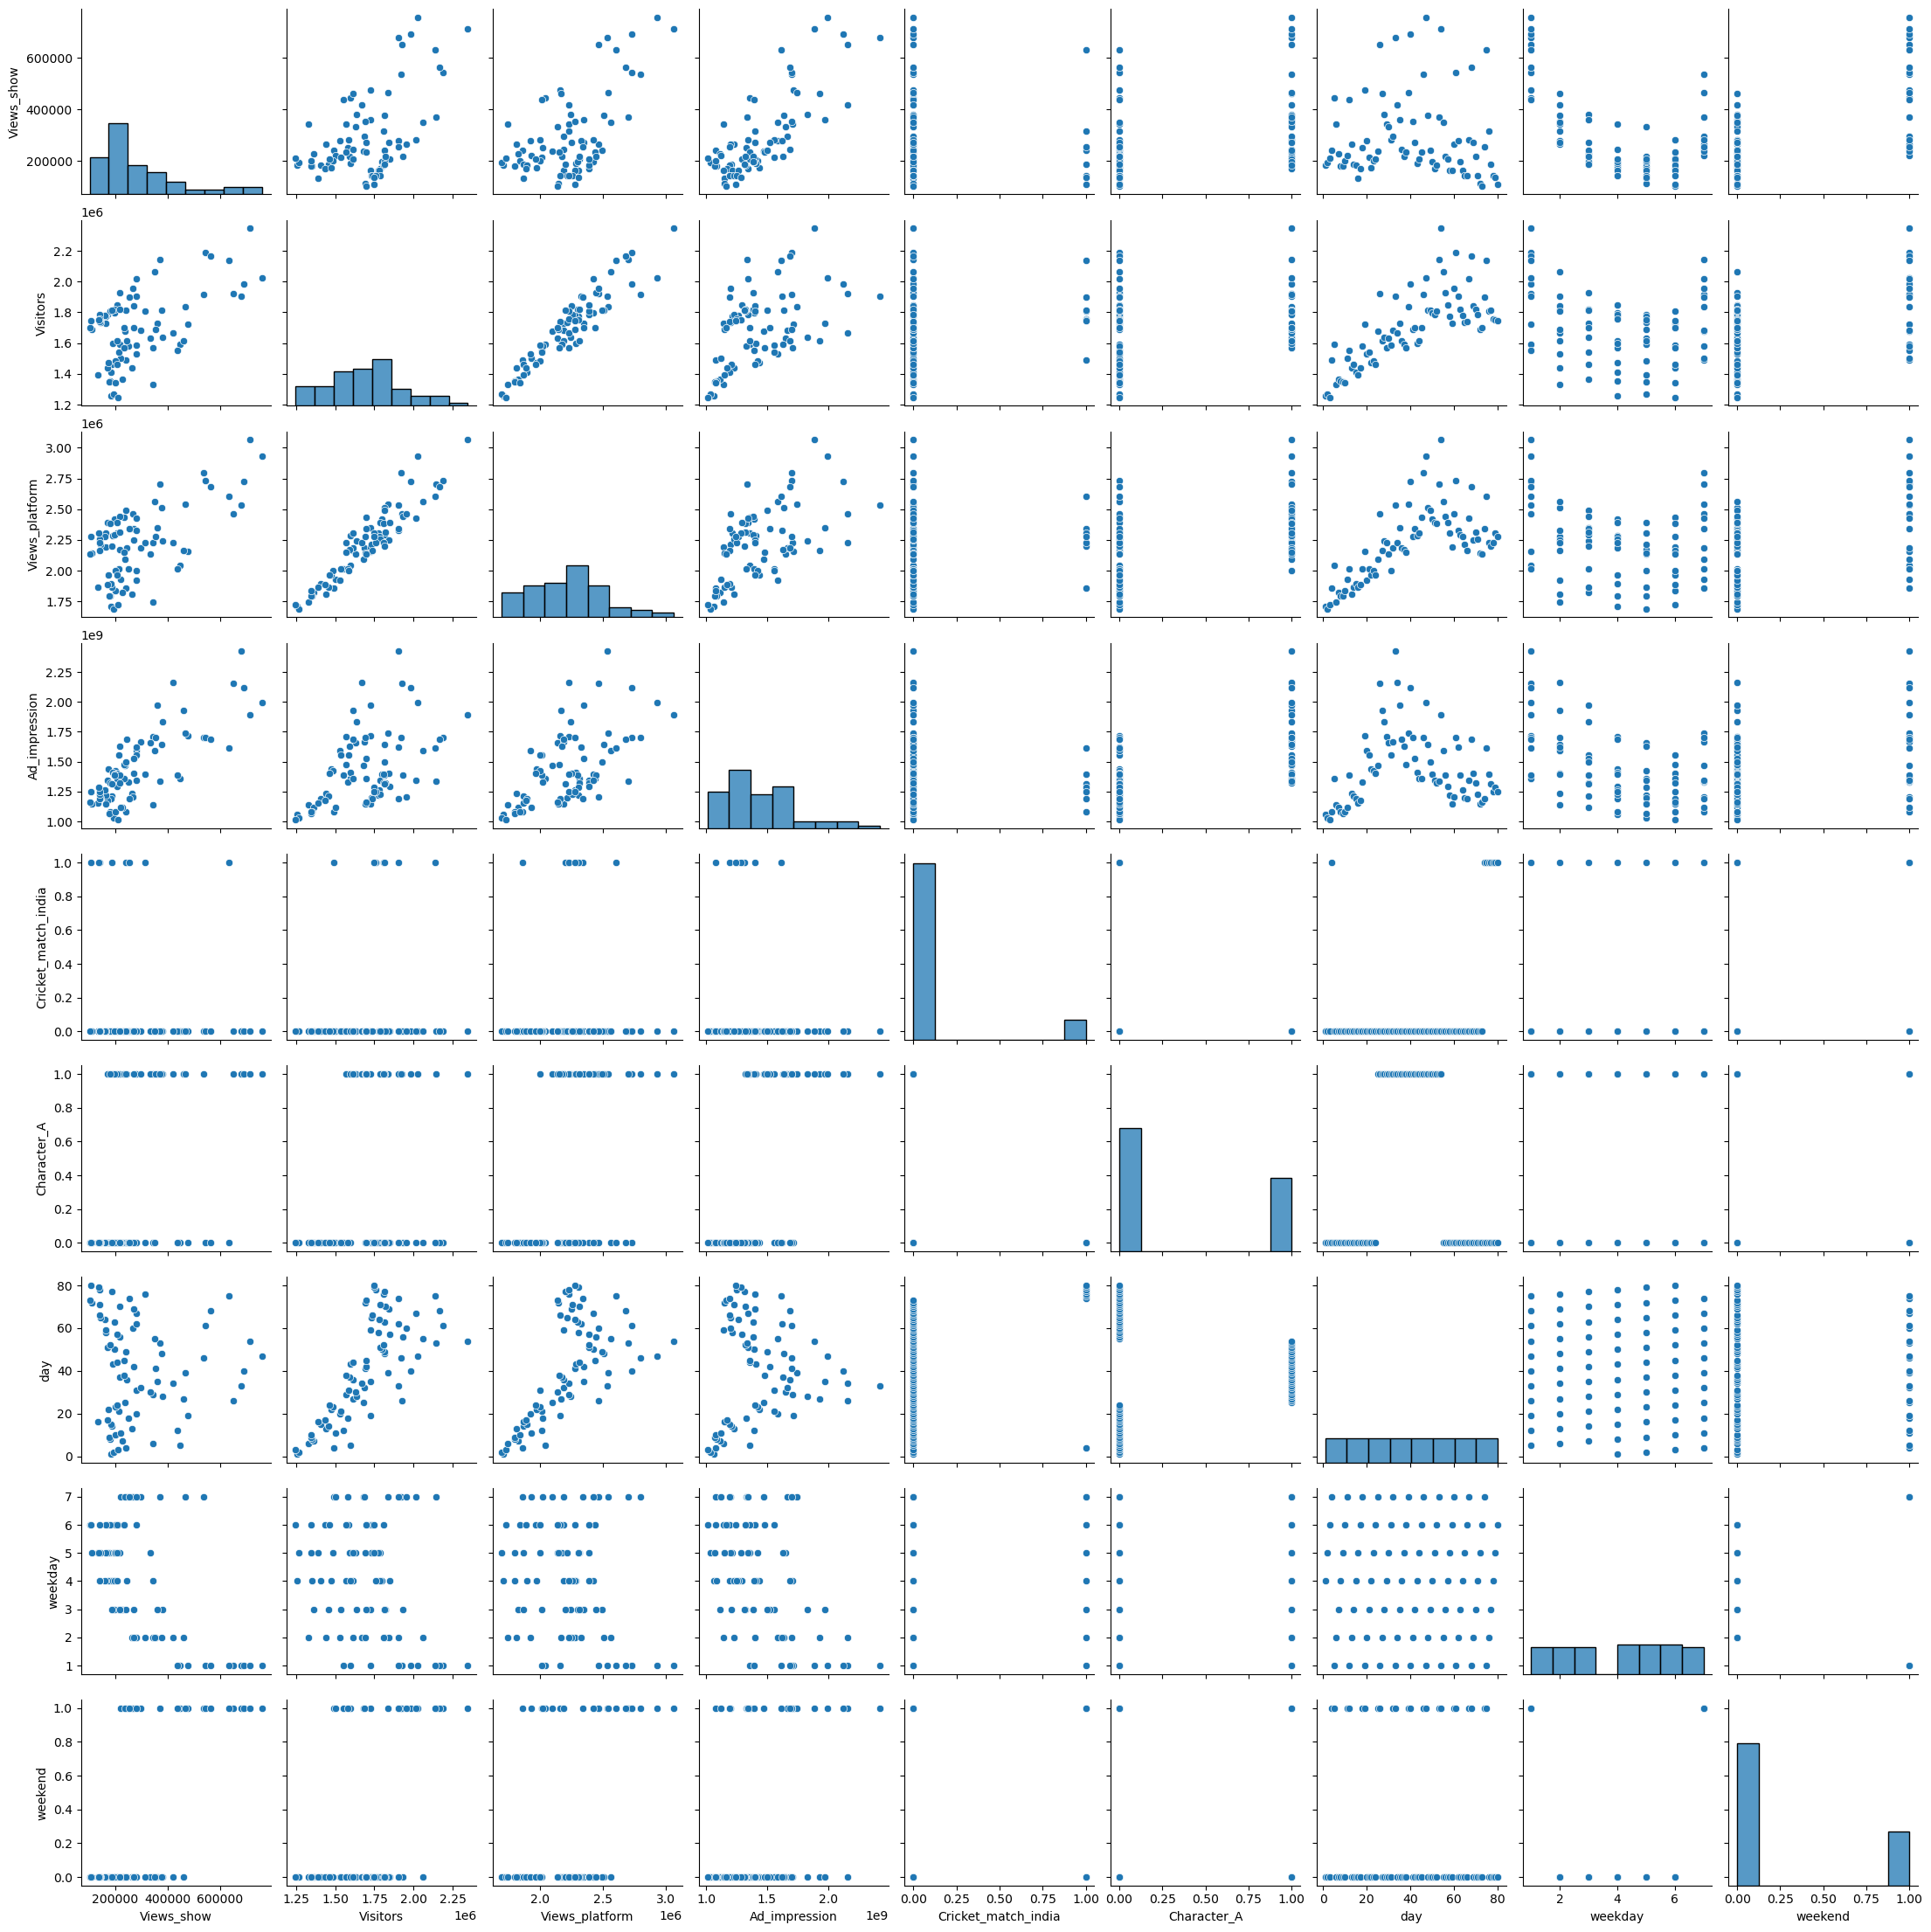

In [28]:
#pairplot to see how variables are associated with each other
sns.pairplot(media)
plt.show()

##  Splitting the data into training and testing sets

In [29]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(media, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
# Apply scaler() to all the columns 
num_vars = ['Views_show', 'Visitors', 'Views_platform', 'Ad_impression','Cricket_match_india', 'Character_A', 'day', 'weekday']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [33]:
df_train.head()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
57,0.100815,0.478141,0.445989,0.145521,0.0,0.0,0.721519,0.666667,0
35,0.233337,0.335410,0.359202,0.480818,0.0,1.0,0.443038,0.500000,0
51,0.130581,0.513024,0.506901,0.221375,0.0,1.0,0.645570,0.833333,0
21,0.115951,0.206039,0.201117,0.302954,0.0,0.0,0.265823,0.500000,0
32,0.945505,0.596801,0.615321,1.000000,0.0,1.0,0.405063,0.000000,1


In [34]:
df_train.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,0.267261,0.404213,0.368020,0.285131,0.125000,0.339286,0.498644,0.544643,0.250000
std,0.219712,0.217058,0.206441,0.208432,0.333712,0.477752,0.307701,0.323321,0.436931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.126856,0.249483,0.218087,0.126252,0.000000,0.000000,0.224684,0.333333,0.000000
50%,0.203375,0.409891,0.366689,0.236056,0.000000,0.000000,0.481013,0.583333,0.000000
75%,0.354509,0.513240,0.485313,0.434694,0.000000,1.000000,0.740506,0.833333,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


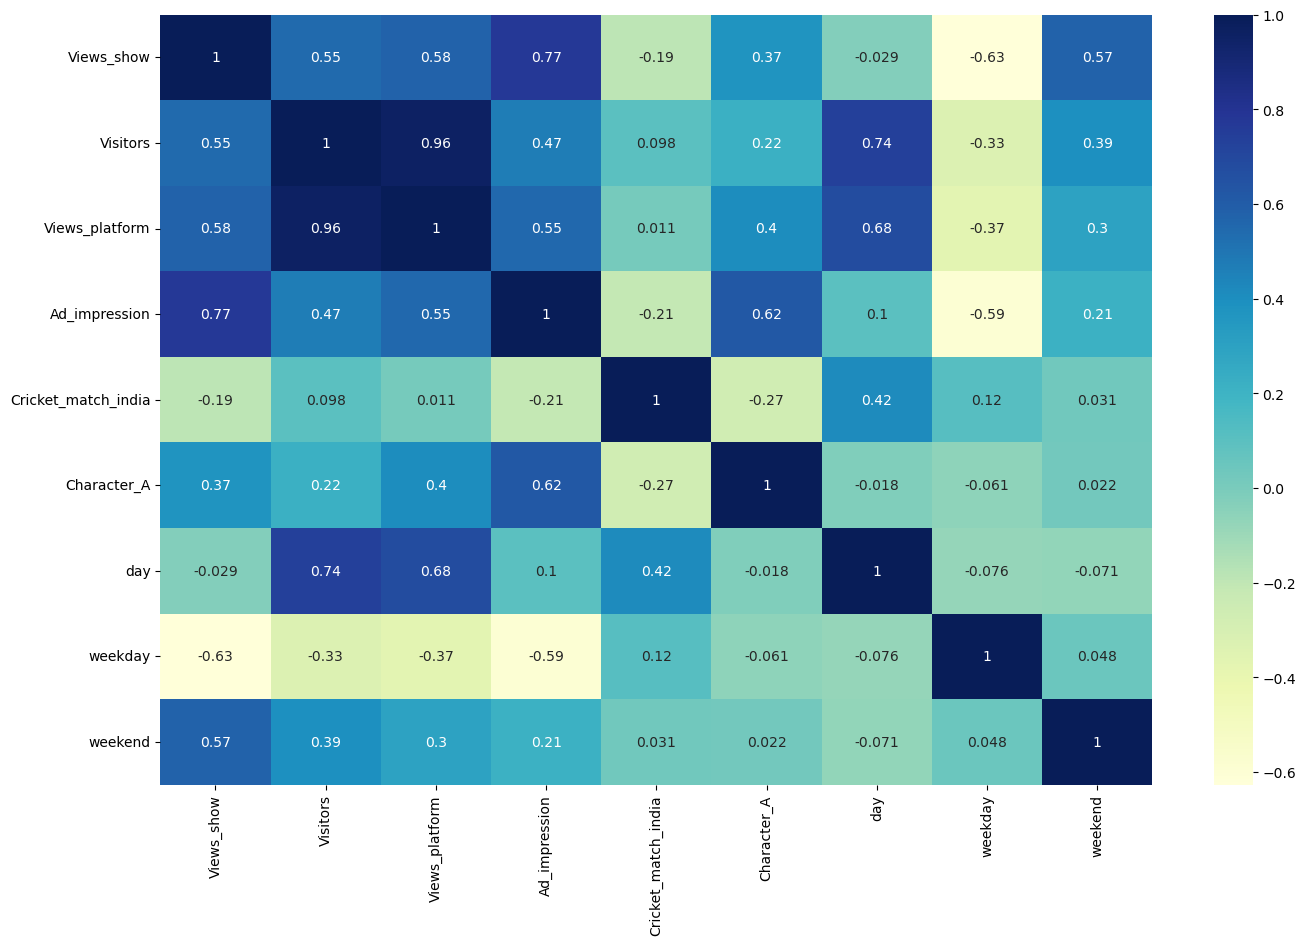

In [35]:
# checking the correlation coefficients to see which variables are highly correlated
# Heat map
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [36]:
y_train = df_train.pop('Views_show')
X_train = df_train

In [37]:
# Check all the columns of the dataframe

media.columns

Index(['Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'day', 'weekday', 'weekend'],
      dtype='object')

In [38]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                  0.204226
Visitors               0.208182
Views_platform         0.307180
Ad_impression          0.330634
Cricket_match_india    0.035249
Character_A           -0.001622
day                   -0.308251
weekday               -0.219336
weekend                0.163498
dtype: float64

In [39]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     61.23
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           2.95e-22
Time:                        13:17:54   Log-Likelihood:                 74.103
No. Observations:                  56   AIC:                            -130.2
Df Residuals:                      47   BIC:                            -112.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2042    

In [40]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Visitors,155.50
1,Views_platform,110.58
5,day,27.63
2,Ad_impression,6.25
4,Character_A,4.52
7,weekend,3.95
6,weekday,2.74
3,Cricket_match_india,1.92


In [42]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('Character_A', 1,)

In [43]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [44]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     71.46
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           3.34e-23
Time:                        13:19:05   Log-Likelihood:                 74.102
No. Observations:                  56   AIC:                            -132.2
Df Residuals:                      48   BIC:                            -116.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2052    

In [45]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Visitors,122.27
1,Views_platform,72.96
4,day,27.34
2,Ad_impression,4.62
6,weekend,3.94
5,weekday,2.33
3,Cricket_match_india,1.92


In [46]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('Visitors', 1)

In [47]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [48]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     83.63
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           5.09e-24
Time:                        13:20:12   Log-Likelihood:                 73.655
No. Observations:                  56   AIC:                            -133.3
Df Residuals:                      49   BIC:                            -119.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2177    

In [49]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Views_platform,21.17
3,day,15.59
1,Ad_impression,4.61
4,weekday,2.27
5,weekend,2.09
2,Cricket_match_india,1.85


In [50]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('Cricket_match_india', 1)

In [51]:
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [52]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     101.1
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           6.42e-25
Time:                        13:21:04   Log-Likelihood:                 73.316
No. Observations:                  56   AIC:                            -134.6
Df Residuals:                      50   BIC:                            -122.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2200      0.036      6.

In [53]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Views_platform,17.48
2,day,10.16
1,Ad_impression,4.61
3,weekday,2.25
4,weekend,1.86


## Residual Analysis of the train data

In [54]:
y_train_views = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

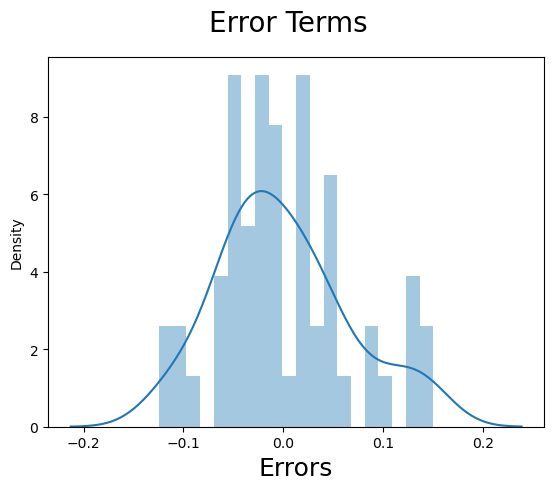

In [56]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_views), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [57]:
num_vars = ['Views_show', 'Visitors', 'Views_platform', 'Ad_impression','Cricket_match_india', 'Character_A', 'day', 'weekday']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [58]:
df_test.head()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
25,0.898051,0.616401,0.564198,0.811668,0.0,1.0,0.316456,0.000000,1
46,1.075137,0.709478,0.905007,0.694568,0.0,1.0,0.582278,0.000000,1
69,0.188889,0.522435,0.453152,0.219929,0.0,0.0,0.873418,0.333333,0
5,0.394058,0.075247,0.037718,0.091529,0.0,0.0,0.063291,0.166667,0
42,0.143819,0.319408,0.430106,0.280583,0.0,1.0,0.531646,0.500000,0


In [59]:
df_test.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.399906,0.427550,0.431417,0.352396,0.041667,0.458333,0.503165,0.416667,0.333333
std,0.305087,0.198990,0.222847,0.214092,0.204124,0.508977,0.266026,0.340503,0.481543
min,0.066516,0.075247,0.037718,0.072838,0.000000,0.000000,0.063291,0.000000,0.000000
25%,0.170891,0.288765,0.309318,0.209413,0.000000,0.000000,0.310127,0.166667,0.000000
50%,0.266022,0.463002,0.429130,0.277464,0.000000,0.000000,0.512658,0.333333,0.000000
75%,0.588594,0.557905,0.562681,0.489401,0.000000,1.000000,0.756329,0.666667,1.000000
max,1.075137,0.809484,0.905007,0.811668,1.000000,1.000000,0.936709,1.000000,1.000000


In [60]:
y_test = df_test.pop('Views_show')
X_test = df_test

In [61]:
y_test.shape

(24,)

In [62]:
X_test_m3 = sm.add_constant(X_test)

In [63]:
X_test_m3 = X_test_m3.drop(["Views_platform", "Character_A",'Cricket_match_india'], axis = 1)

In [64]:
y_pred_m3 = lr_4.predict(X_test_m3)

In [65]:
y_pred_m3.shape

(24,)

Text(0, 0.5, 'y_pred')

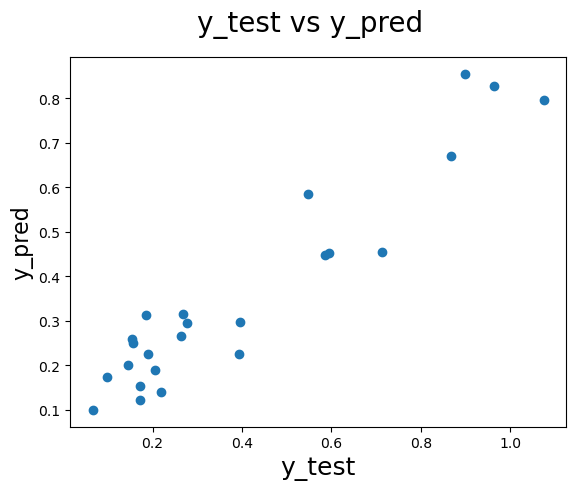

In [66]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m3)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [67]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_m3)
r_squared = r2_score(y_test, y_pred_m3)

In [68]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.014302415852016229
r_square_value : 0.8396587098375076


In [69]:
Predicted_views=pd.concat([y_train_views,y_pred_m3])
Views_show=pd.concat([y_train,y_test])

Text(0, 0.5, 'Views')

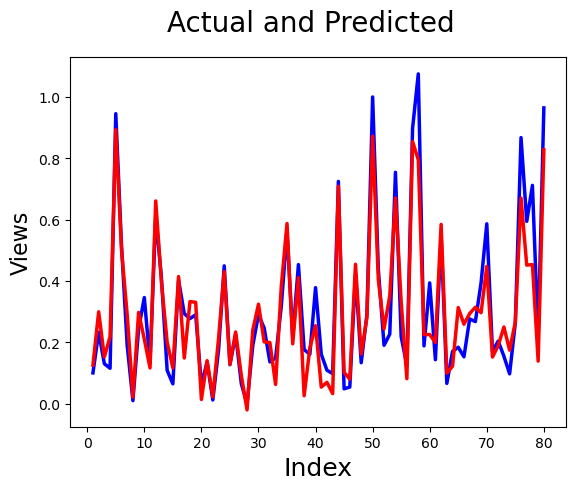

In [70]:
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)   

Text(0, 0.5, 'Views_show-Predicted_views')

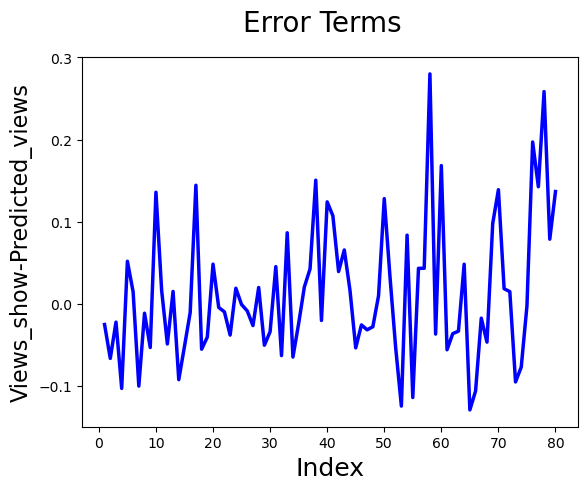

In [71]:
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)  

In [ ]:
Summary
The model Could Explain 84% of variation when fitted on test data

Significant features in the model are:

Views_platform: The number of Viewers of the platform.

Ad_impressions: The number of ad impressions that the show received.

day: The day of the week that the show was released.

weekday: Whether the show was released on a weekday.

weekend: Whether the show was released on a weekend.

Important results
1.The show get more views when it is released in a platform where more number of viewers use.

2.Ad_impressions of show have positive impact on number of views.

3.There is a rise in the views at the weekends and fall in views at weekdays.